In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences
plt.style.use('seaborn-v0_8-white')

In [3]:
def make(name):
    Data = pd.read_csv(name)
    Data.columns=['id','Position','sentiment','text']
    Data.drop(['id','Position'],axis=1,inplace=True)
    Data.dropna(inplace=True)
    return Data
Train = make('twitter_training.csv')
Test = make('twitter_validation.csv')

<Axes: xlabel='sentiment'>

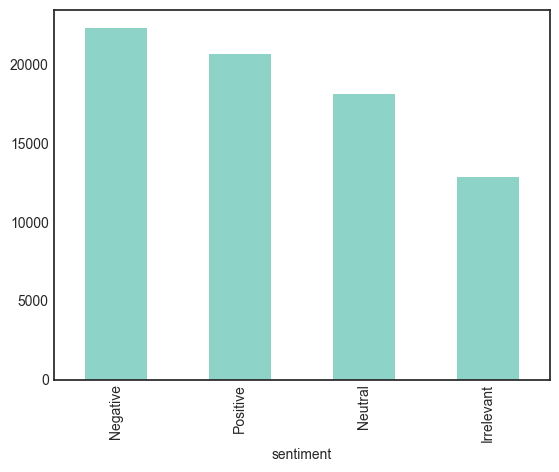

In [4]:
Train["sentiment"].value_counts().plot(kind='bar')

In [5]:
def get_vocab(Data):
    Vocabulary = {}
    word_encoding = 1
    for i in range(len(Data)):
        line = Data.iloc[i]['text']
        for word in line.split():
            if word not in Vocabulary:
                Vocabulary[word] = word_encoding
                word_encoding += 1
    return Vocabulary

Vocabulary = get_vocab(Train)

In [6]:
def one_hot_encoding(text,vocab=Vocabulary):
  words = text.lower().split(" ") 
  encoding = []  
  for word in words:
    if word in vocab:
      encoding.append(vocab[word])
    else:
      encoding.append(0)
  return np.array(encoding)

In [7]:
def Prepare(Data):
    Data['text']=Data['text'].astype(str)
    Data['text']=Data['text'].map(lambda x: x.lower())
    Data['text']= Data['text'].map(lambda x: one_hot_encoding(x))
    Filt ={'positive': 1, 'negative': 0, 'neutral': 2, 'irrelevant': 3}
    Data['sentiment'] = Data['sentiment'].apply(lambda x: Filt[x.lower()])

Prepare(Train)
Prepare(Test)

Train_X, Train_Y ,Test_X, Test_Y = Train['text'], Train['sentiment'], Test['text'], Test['sentiment']
Train_X = pad_sequences(Train_X, maxlen=1000)
Test_X = pad_sequences(Test_X, maxlen=1000)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [14]:
num_classes = 4

model = Sequential([
    Embedding(85000, 32),
    LSTM(32),
    Dense(num_classes, activation='softmax')  # Use softmax for multi-class classification
])

# Compile the model with sparse categorical crossentropy loss for integer labels
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer labels
              metrics=['accuracy'])

# Assuming Train["sentiment"] contains integer labels
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          2720000   
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 2728452 (10.41 MB)
Trainable params: 2728452 (10.41 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
Hist = model.fit(Train_X, Train_Y, epochs=4, batch_size=64,validation_split=0.2)

Epoch 1/4
925/925 [==============================] - 401s 430ms/step - loss: 0.9365 - accuracy: 0.6147 - val_loss: 1.3590 - val_accuracy: 0.4822
Epoch 2/4
925/925 [==============================] - 386s 418ms/step - loss: 0.3742 - accuracy: 0.8649 - val_loss: 1.6860 - val_accuracy: 0.4650
Epoch 3/4
925/925 [==============================] - 386s 418ms/step - loss: 0.2252 - accuracy: 0.9160 - val_loss: 2.0318 - val_accuracy: 0.4542
Epoch 4/4
925/925 [==============================] - 452s 489ms/step - loss: 0.1739 - accuracy: 0.9331 - val_loss: 2.4509 - val_accuracy: 0.4382


In [26]:
model.save('model.keras')

In [9]:
model = tf.keras.models.load_model('model.keras')

In [10]:
Prediction = model.predict(Test_X[0:])

32/32 [==============================] - 5s 106ms/step


In [13]:
Prediction

array([[6.72216192e-05, 1.03206930e-05, 9.99913931e-01, 8.56070892e-06],
       [9.98359025e-01, 1.37093419e-04, 1.43666391e-03, 6.72536262e-05],
       [9.99947429e-01, 1.97569061e-05, 2.06008499e-05, 1.21913345e-05],
       ...,
       [7.23580843e-06, 9.99768436e-01, 1.41477896e-04, 8.27811746e-05],
       [3.83626248e-05, 9.99951005e-01, 6.77009484e-06, 3.84337227e-06],
       [1.17547072e-01, 2.50720866e-02, 8.45147431e-01, 1.22333895e-02]],
      dtype=float32)

In [19]:
Prediction = np.argmax(Prediction, axis=1)
Prediction

array([2, 0, 0, 2, 0, 2, 1, 1, 0, 1, 1, 0, 2, 0, 3, 1, 0, 1, 0, 1, 2, 3,
       0, 2, 2, 0, 3, 3, 0, 1, 1, 2, 0, 0, 2, 2, 3, 1, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 3, 0, 1, 1, 3, 0, 3, 0,
       3, 2, 0, 1, 2, 0, 1, 1, 3, 1, 3, 2, 2, 2, 1, 1, 2, 1, 2, 0, 3, 0,
       0, 2, 2, 2, 2, 3, 0, 0, 0, 3, 2, 2, 0, 1, 1, 2, 1, 2, 1, 0, 2, 2,
       2, 0, 2, 0, 2, 3, 1, 1, 2, 0, 0, 1, 0, 2, 2, 1, 1, 0, 2, 3, 3, 2,
       1, 1, 3, 2, 2, 3, 3, 3, 2, 2, 3, 3, 0, 1, 2, 1, 3, 1, 0, 2, 2, 2,
       3, 2, 0, 2, 1, 0, 2, 0, 3, 3, 3, 1, 0, 0, 0, 1, 1, 1, 0, 2, 1, 3,
       2, 1, 2, 3, 2, 0, 0, 2, 1, 1, 3, 3, 2, 1, 1, 2, 3, 2, 0, 0, 1, 0,
       1, 2, 2, 3, 1, 1, 1, 0, 1, 1, 1, 2, 3, 0, 1, 3, 3, 1, 1, 1, 0, 3,
       1, 1, 1, 0, 3, 3, 2, 1, 0, 1, 3, 2, 3, 3, 0, 0, 2, 1, 3, 3, 3, 1,
       1, 3, 3, 2, 1, 2, 0, 1, 1, 1, 1, 2, 3, 1, 0, 2, 1, 2, 0, 2, 2, 0,
       1, 1, 3, 2, 2, 3, 1, 2, 3, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 3, 1, 2,
       2, 0, 1, 0, 1, 3, 2, 2, 2, 1, 0, 2, 0, 3, 1,

In [21]:
def Evaluate(Prediction, Test_Y):
    from sklearn.metrics import accuracy_score, confusion_matrix
    print("Accuracy: {:.2f}%".format(accuracy_score(Test_Y, Prediction) * 100))
    print("Confusion Matrix:")
    print(confusion_matrix(Test_Y, Prediction))

In [22]:
Evaluate(Prediction, Test_Y)

Accuracy: 84.58%
Confusion Matrix:
[[215  15  26  10]
 [ 14 237  13  13]
 [ 14  13 244  14]
 [  6   8   8 149]]
